# BHBs formation

Black-Hole Binaries have several type of formation channel, for example common envelop (CE), chemically omogenous stars (CHE), globular clusters (GC), nuclear star clusters (NSC), and stable mass transfer (SMT).

In [1]:
import numpy as np
from scipy import stats, interpolate
from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn.mixture import GaussianMixture
from scipy import optimize

#### First we take into account LIGO data about the masses of BHs. Let's analyze the data to see how many modes are present. 

In [2]:
x = np.load('../../solutions/formationchannels.npy')
y = x[:,0]
print(y)
print(y.shape)

[17.12172682  5.94121793  6.35914124 ... 34.34170191 30.27018478
 25.93264098]
(2950,)


Text(0, 0.5, '$Counts')

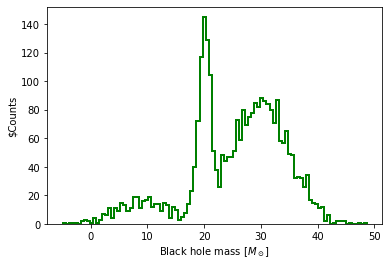

In [3]:
plt.hist(y, bins = 100, histtype='step', linewidth = 2, color = 'green');
plt.xlabel("Black hole mass $[M_\odot]$")
plt.ylabel('$Counts')

## Trial fit

Here we'll use scikit-learn's GaussianMixture model. The fit() method uses an Expectation-Maximization approach to find the best mixture of Gaussians for the data.

Visually we observe three modes for out model, let's try fitting the data with a mixture of three gaussians.

In [4]:
gm = GaussianMixture(n_components=3, covariance_type='diag').fit(x)
#print(gm.weights_)
#print(gm.means_)
#print(gm.covariances_)
#print(gm.covariances_.shape)
#print(gm.get_params())
mean = gm.means_
wei = gm.weights_
var = (gm.covariances_)**0.5

print(wei)
print(var)
print(mean)


[0.2136368  0.67007695 0.11628626]
[[1.06058162]
 [4.9181412 ]
 [4.6736088 ]]
[[20.04958006]
 [30.11424774]
 [ 9.09732207]]


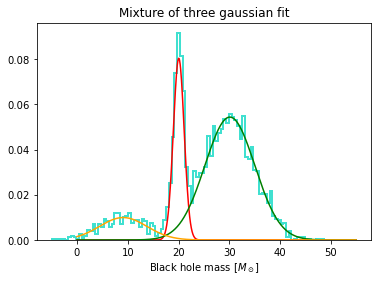

In [5]:
plt.hist(y, bins = 100, density =True, histtype='step', linewidth = 2, color = 'turquoise')
xgrid = np.linspace(0, 55, 1000)

distG1 = wei[0] * stats.norm(mean[0], var[0]).pdf(xgrid)
distG2 = wei[1] * stats.norm(mean[1], var[1]).pdf(xgrid)
distG3 = wei[2] * stats.norm(mean[2], var[2]).pdf(xgrid)

plt.plot(xgrid, distG1, color = 'r')
plt.plot(xgrid, distG2, color = 'g')
plt.plot(xgrid, distG3, color = 'orange')
plt.title('Mixture of three gaussian fit')
plt.xlabel("Black hole mass $[M_\odot]$")
plt.show()

## N = 1, ..., 10 Gaussians

Now we want to use different models, in particular mixtures of  different number of gaussians 

In [6]:
N = np.arange(1, 10)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(x)

To see what it is the best model for our data set we can compute the $AIC$ = Akaike Information Criterion for each model and choose the ones with the lowest AIC

In [7]:
AIC = [m.aic(x) for m in models]

[20945.9726085902, 20753.496007115136, 20082.257061198165, 20101.612849149024, 20114.33459023101, 20121.242972150052, 20129.846987716308, 20132.44743869168, 20137.18481006441]


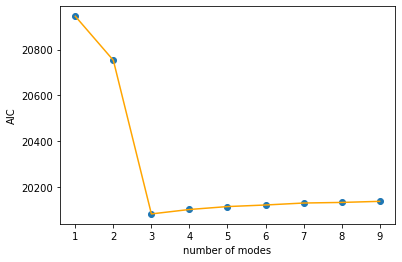

In [8]:
print(AIC)
plt.plot(N, AIC, color = 'orange')
plt.scatter(N, AIC)

plt.xlabel('number of modes')
plt.ylabel('AIC')
plt.show()

In [9]:
print("Lowest AIC: %.1f" %min(AIC))
print("Number of modes with the lowest AIC %.0f" % (np.argsort(AIC)[0]+1) )

Lowest AIC: 20082.3
Number of modes with the lowest AIC 3


Let's look at our result, with also the individuals modes.

C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_16476\3058078495.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xgrid, pdf, '--k', color ='red')


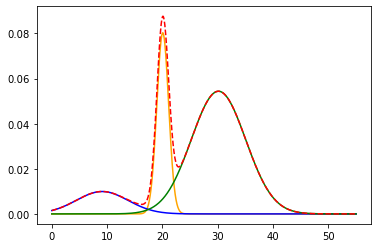

In [10]:
gm_good = GaussianMixture(n_components=3, covariance_type='diag').fit(x)

logL = gm_good.score_samples(xgrid.reshape(-1,1))
pdf =  np.exp(logL)
resp = gm_good.predict_proba(xgrid.reshape(-1,1))
component = resp * pdf[:, np.newaxis]

plt.plot(xgrid, component[:,0], c = 'orange')
plt.plot(xgrid, component[:,1], c = 'blue')
plt.plot(xgrid, component[:,2], c = 'green')
plt.plot(xgrid, pdf, '--k', color ='red')

Text(0.5, 1.0, 'Responsability')

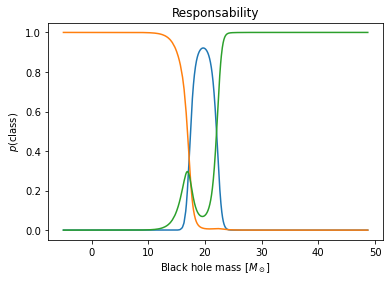

In [17]:
data_sorted = np.sort(x, axis = 0)
plt.plot(data_sorted,  gm_good.predict_proba(data_sorted)[:,0])
plt.plot(data_sorted,  gm_good.predict_proba(data_sorted)[:,1])
plt.plot(data_sorted,  gm_good.predict_proba(data_sorted)[:,2])
plt.xlabel("Black hole mass $[M_\odot]$")
plt.ylabel(r'$p({\rm class})$')
plt.title('Responsability')